In [5]:

%%javascript

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k', {
    help : 'move up selected cells',
    help_index : 'jupyter-notebook:move-selection-up',
    handler : function (event) {
        IPython.notebook.move_selection_up();
        return false;
    }}
);

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j', {
    help : 'move down selected cells',
    help_index : 'jupyter-notebook:move-selection-down',
    handler :  function (event) {
        IPython.notebook.move_selection_down();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)


In [7]:
df.describe()        

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,48967,3598,82796,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,5851,14,24,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",Iphone,CustomerService,google,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,1207,1528,58153,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [8]:
df_campaign = df[df.campaign_source.notnull()][['person', 'campaign_source']]
df_campaign = df_campaign.drop_duplicates('person')             #  SERIE CON PERSONAS QEUE ESTAN EN CAMPAIGN
df_campaign_users = df.loc[df['person'].isin(campaign_persons), :]
df_campaign_users_buys = df_campaign_users.loc[df['event'] == 'conversion']
df_campaign.describe()

NameError: name 'campaign_persons' is not defined

## Analisis del evento "lead"

Veremos como se comporta los usuarios que accedieron a este evento de la pagina.

In [9]:
lead = (df.loc[df['event'] == 'lead'])['person']
df_lead_users = df.loc[df.person.isin(lead)]
df_lead_users.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,63887,63887,63887,3881,34000,34448,34000,34000,34000,17265,3060,410,3882,2283,5529,5529,5529,5529,5529,5529,5529,5529,5529
unique,56926,11,291,148,1947,181,5,8,61,6736,733,12,19,3,6,2,278,27,5,3,47,35,81
top,2018-03-21 01:11:52,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"3371,6357,6371,2777,3191,6791,2718,2725,6399,3...",J7,CustomerService,google,Google,Direct,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,6,32907,2771,1362,259,2558,14599,12286,8984,62,109,226,2258,2221,1830,5243,1006,1152,5376,2813,1949,1329,1032


Vemos que solo 291 personas lo utilizaron

In [10]:
event_counts_lead= df_lead_users.event.value_counts()
checkout_vs_conversion = event_counts_lead.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing', 'visited site','generic listing','searched products', 'search engine hit'])
event_counts_lead

viewed product       32907
brand listing         9439
visited site          5529
generic listing       4381
ad campaign hit       3887
searched products     3510
search engine hit     2283
checkout               969
lead                   448
staticpage             410
conversion             124
Name: event, dtype: int64

Tambien vemos que de esas 291 personas se realizaron 124 conversion lo que es un muy buen valor dada la proporcion

Text(0,0.5,'Event Name')

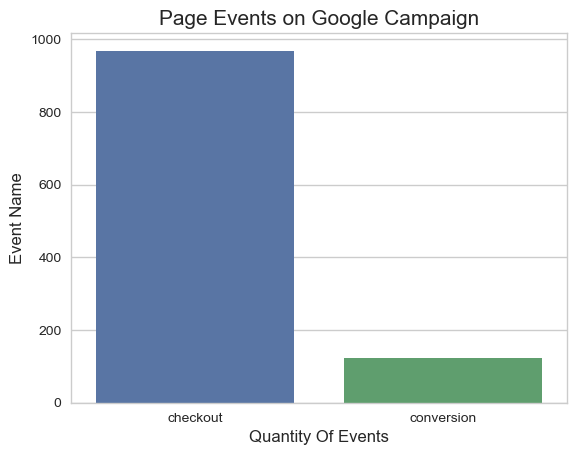

In [12]:
g = sns.barplot(x=checkout_vs_conversion.index, y=checkout_vs_conversion.values, orient='v')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

De la misma forma estos valores siguen siendo bajos con respecto a los checkout

In [13]:
conversion_person_lead =(df_lead_users.loc[df_lead_users['event'] == 'conversion'])['person']
df_lead_users_conversion = df_lead_users.loc[df_lead_users['person'].isin(conversion_person_lead)]
event_counts_lead_conversion= df_lead_users_conversion.event.value_counts()
checkout_vs_conversion_lead= event_counts_lead_conversion.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing', 'visited site','generic listing','searched products', 'search engine hit'])
event_counts_lead_conversion


viewed product       10200
brand listing         3363
visited site          2248
generic listing       1973
ad campaign hit       1751
searched products     1572
search engine hit     1043
checkout               421
staticpage             283
conversion             124
lead                   119
Name: event, dtype: int64

In [14]:
conversion_person_lead.describe()

count          124
unique          58
top       a0d4baef
freq            11
Name: person, dtype: object

De las 291 personas 58 decidieron comprar, y al tener 124 compras vemos que muchos compraron mas de una vez!


Text(0,0.5,'Event Name')

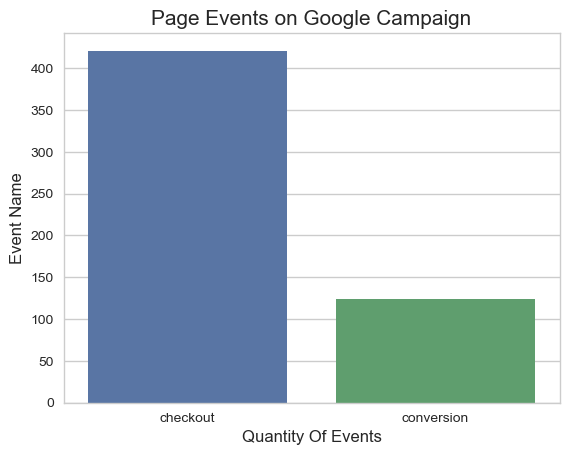

In [15]:
g = sns.barplot(x=checkout_vs_conversion_lead.index, y=checkout_vs_conversion_lead.values, orient='v')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

Haciendo los mismos pasos que hicimos en la campaña la conversion sigue siendo notoriamente menor a los checkouts aunque sean personas que realizaron compras

## Top  Smartphone Resolutions

In [16]:
s_smartphone = (df.loc[df['device_type'] == 'Smartphone'])['screen_resolution'].value_counts()

In [17]:
s = s_smartphone.nlargest(15)
s

360x640    29965
320x534     3619
320x570     2560
320x568     1779
412x732      934
375x667      931
424x753      743
320x480      598
320x569      551
414x736      231
640x360      226
480x800      215
360x740      203
320x427      163
480x853      144
Name: screen_resolution, dtype: int64

In [18]:
person_top_smartphone = (df.loc[df['screen_resolution'].isin(s.index)])['person']
person_top_smartphone.describe()

count        42918
unique       14031
top       6b07be7b
freq           257
Name: person, dtype: object

In [19]:
df_smartphone = df.loc[df['person'].isin(person_top_smartphone)]
df_smartphone = df_smartphone.loc[df_smartphone['device_type'] == 'Computer']
df_smartphone.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,5304,5304,5304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5304,5304,5304,5304,5304,5304,5304,5304,5304
unique,5299,1,624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2,332,31,4,1,37,14,51
top,2018-05-10 15:58:55,visited site,f3a682fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct,Returning,São Paulo,Sao Paulo,Brazil,Computer,1366x768,Windows 7,Chrome 66.0
freq,2,5304,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200,5008,796,1573,5199,5304,2577,2539,1910


## New Vs Returning

In [20]:
s_new = (df.loc[df.new_vs_returning == 'New'])['person']
df_new_that_returned = df.loc[df.person.isin(s_new)]
df_new_that_returned['new_vs_returning'].value_counts()

Returning    60479
New          26898
Name: new_vs_returning, dtype: int64

## Search engine hit con conversion

In [21]:
s_search = (df.loc[df['event'] == 'search engine hit'])['person']
df_search_engine_hit = df.loc[df['person'].isin(s_search)]
df_search_engine_hit.describe()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,832957,832957,832957,62463,462042,462417,462042,462042,462042,185702,41595,3036,62497,50957,67899,67899,67899,67899,67899,67899,67899,67899,67899
unique,663576,11,17205,219,3439,202,5,8,63,31808,5093,14,22,4,7,2,1733,78,38,4,219,110,264
top,2018-06-14 15:43:38,viewed product,6b07be7b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",Iphone,CustomerService,google,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,9,438604,2770,24545,3505,42070,195444,155702,107175,494,1002,1334,47022,50240,32785,50732,12149,19931,65551,33994,23389,15858,18025


In [22]:
df_search_engine_hit['event'].value_counts()

viewed product       438604
brand listing         82190
visited site          67899
ad campaign hit       62520
generic listing       56596
search engine hit     50957
searched products     47342
checkout              22545
staticpage             3036
conversion              893
lead                    375
Name: event, dtype: int64

## Operating System durante los meses

In [23]:
df_osv = df.loc[df['operating_system_version'].notnull(), : ]
df_osv = df_osv[['timestamp', 'operating_system_version']]
df_osv.head()
os = df_osv['operating_system_version'].value_counts()
s_os = os.nlargest(10)
s_os


Windows 7        19675
Windows 10       17110
Android 7         9964
Android 6.0.1     7805
Android 6         6871
Android 5.1.1     4123
Android 7.1.1     3325
Windows 8.1       2781
Android 5.0.2     1640
Android 4.4.2     1402
Name: operating_system_version, dtype: int64

In [24]:
df_windows = df_osv.loc[df_osv['operating_system_version'].str.contains('Windows')]
df_ios = df_osv.loc[df_osv['operating_system_version'].str.contains('iOS')]
df_android = df_osv.loc[df_osv['operating_system_version'].str.contains('Android')]
df_mac = df_osv.loc[df_osv['operating_system_version'].str.contains('Mac')]

df_windows['OS'] = 'Windows'
df_ios['OS'] = 'iOS'
df_android['OS'] = 'Android'
df_mac['OS'] = 'Mac'

df_windows = df_windows[['timestamp','OS']]
df_ios = df_ios[['timestamp','OS']]
df_android = df_android[['timestamp','OS']]
df_mac = df_mac[['timestamp','OS']]




frames = [df_windows, df_ios, df_android, df_mac]
df_os = pd.concat(frames)

In [25]:
df_os['date'] = pd.to_datetime(df_os['timestamp'])
df_os['month'] = df_os['date'].dt.month
ct = pd.crosstab(df_os.month, df_os.OS)
ct.head(10)
ct.describe()

OS,Android,Mac,Windows,iOS
count,6.000000,6.000000,6.000000,6.000000
mean,6901.666667,67.666667,6915.833333,589.833333
std,6900.759340,65.600813,6929.931873,612.008960
min,1055.000000,1.000000,959.000000,99.000000
25%,1872.000000,19.500000,1856.750000,159.250000
50%,4583.000000,54.000000,4919.500000,348.500000
75%,9657.250000,99.000000,9243.000000,828.750000
max,18872.000000,175.000000,19177.000000,1658.000000


Text(72.7222,0.5,'Month')

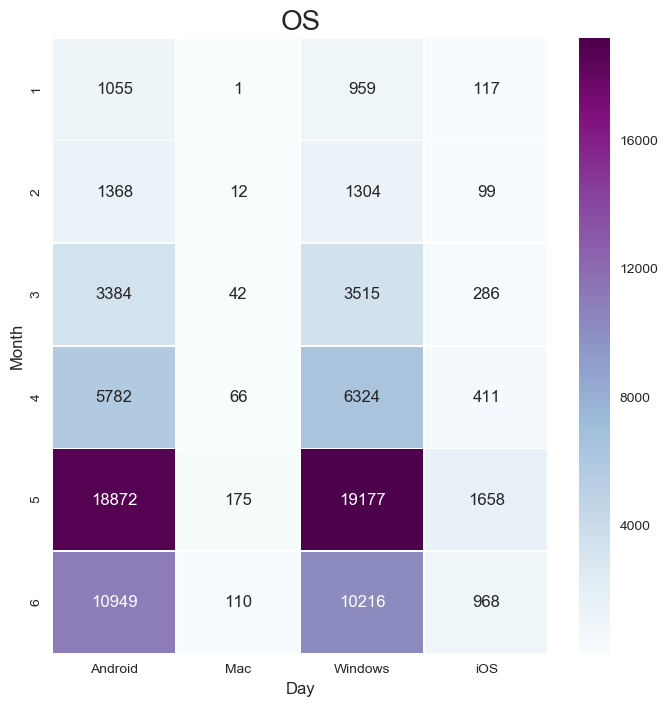

In [26]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("OS",fontsize=20)
grafico_dia_mes.set_xlabel("Day",fontsize=12)
grafico_dia_mes.set_ylabel("Month",fontsize=12)

# Teléfonos más buscados vs. los más comprados.

## Brasil

El país con más información en el dataframe es Brasil. Procederemos a buscar cuáles son los 10 smartphones mas buscados por sus habitantes.

In [27]:
df_grouped_by_country = df.groupby('country')
brazilians = df_grouped_by_country.get_group('Brazil')['person']
df_brazilians = df.loc[df['person'].isin(brazilians),:]
top10_models_brazil = df_brazilians['model'].value_counts().head(10)

Text(0,0.5,'Frequency')

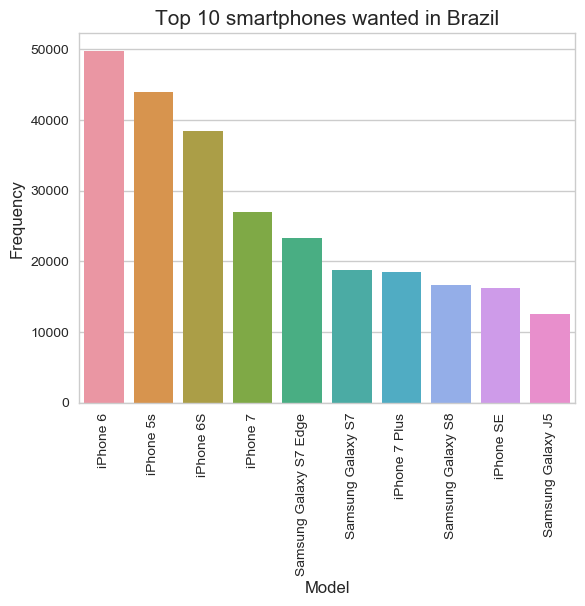

In [28]:
g = sns.barplot(x=top10_models_brazil.index, y=top10_models_brazil.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Top 10 smartphones wanted in Brazil", fontsize = 15)
g.set_xlabel("Model", fontsize = 12)
g.set_ylabel("Frequency", fontsize = 12)

El gráfico de arriba muestra los 10 smartphones más buscados por los habitantes de Brasil. Ahora, buscaremos los 10 teléfonos mas vendidos alli, para ver si hay alguna coincidencia.

Text(0,0.5,'Frequency')

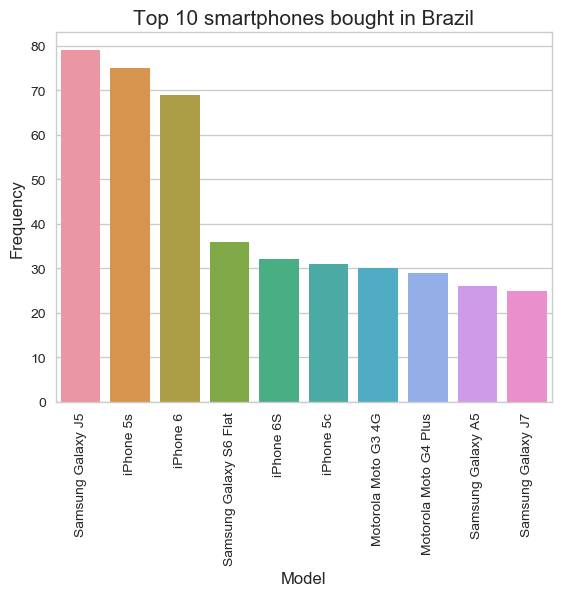

In [29]:
brazilians_who_bought = df_brazilians.loc[df_brazilians['event'] == 'conversion', :]
top10_buy_brazil = brazilians_who_bought['model'].value_counts().head(10)
g2 = sns.barplot(x=top10_buy_brazil.index, y=top10_buy_brazil.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Top 10 smartphones bought in Brazil", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

Se puede ver que el modelo Samsung Galaxy J5 no es el modelo mas buscado, pero si es el mas vendido. Por otra parte, iPhone 5s y iPhone 6 se mantienen en el podio, tanto de los mas buscados como los mas vendidos.

# United States

Procederemos a hacer el mismo analisis sobre los datos extraidos de los habitantes estadounidenses.

In [30]:
usa = df_grouped_by_country.get_group('United States')['person']
df_usa = df.loc[df['person'].isin(usa),:]
top10_models_usa = df_usa['model'].value_counts().head(10)

Text(0,0.5,'Frequency')

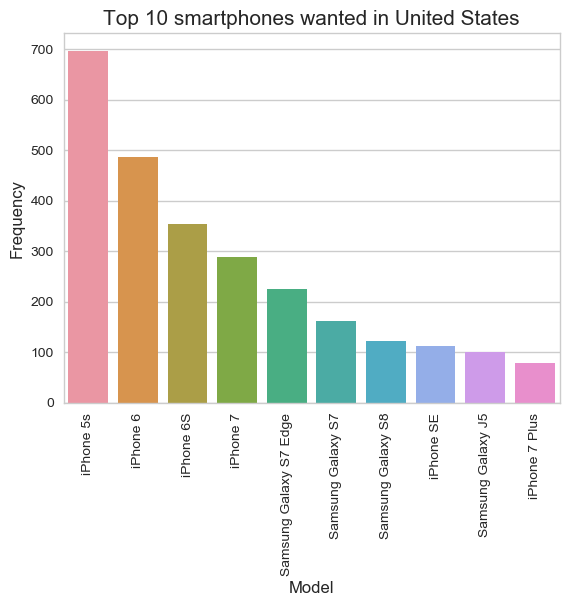

In [31]:
g1 = sns.barplot(x=top10_models_usa.index, y=top10_models_usa.values, orient = 'v')
plt.xticks(rotation=90)
g1.set_title("Top 10 smartphones wanted in United States", fontsize = 15)
g1.set_xlabel("Model", fontsize = 12)
g1.set_ylabel("Frequency", fontsize = 12)

Text(0,0.5,'Frequency')

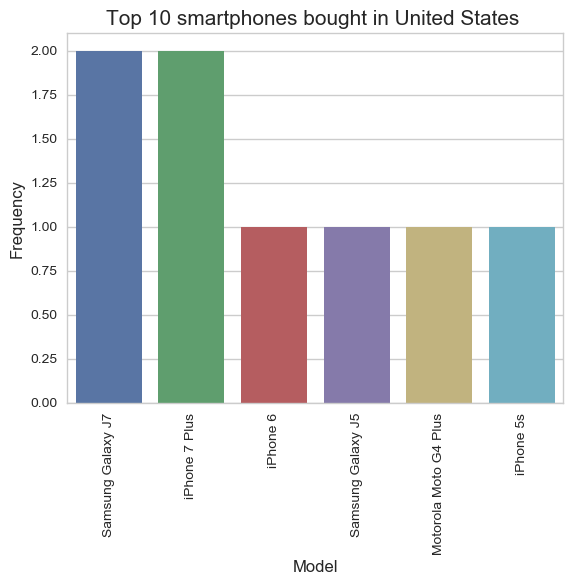

In [32]:
americans_who_bought = df_usa.loc[df_usa['event'] == 'conversion', :]
top10_buy_usa = americans_who_bought['model'].value_counts().head(10)
g3 = sns.barplot(x=top10_buy_usa.index, y=top10_buy_usa.values, orient = 'v')
plt.xticks(rotation=90)
g3.set_title("Top 10 smartphones bought in United States ", fontsize = 15)
g3.set_xlabel("Model", fontsize = 12)
g3.set_ylabel("Frequency", fontsize = 12)

## Teléfonos vendidos por mes.

In [33]:
df_conversions = df.loc[df['event'] == 'conversion', : ]
df_conversions = df_conversions[['timestamp', 'event', 'condition', 'model']]
df_conversions.head()

,timestamp,event,condition,model
220,2018-03-20 17:46:12,conversion,Muito Bom,Motorola Moto X2
2282,2018-04-26 22:28:53,conversion,Muito Bom,Samsung Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,conversion,Muito Bom,Samsung Galaxy S6 Flat
4245,2018-03-16 13:50:25,conversion,Bom,iPhone 5s
6985,2018-02-09 22:07:07,conversion,Bom,Samsung Galaxy J5


In [34]:
df_conversions['date'] = pd.to_datetime(df_conversions['timestamp'])
df_conversions['month'] = df_conversions['date'].dt.month
df_conversions['day'] = df_conversions['date'].dt.weekday_name
ct = pd.crosstab(df_conversions.month, df_conversions.day)
ct.head(10)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,7,9,4,6,6,13,18
2,11,11,12,3,20,11,6
3,38,41,34,26,36,57,33
4,51,58,25,39,46,54,43
5,49,54,21,23,70,62,72
6,19,11,10,6,22,18,17


Text(72.7222,0.5,'Mes')

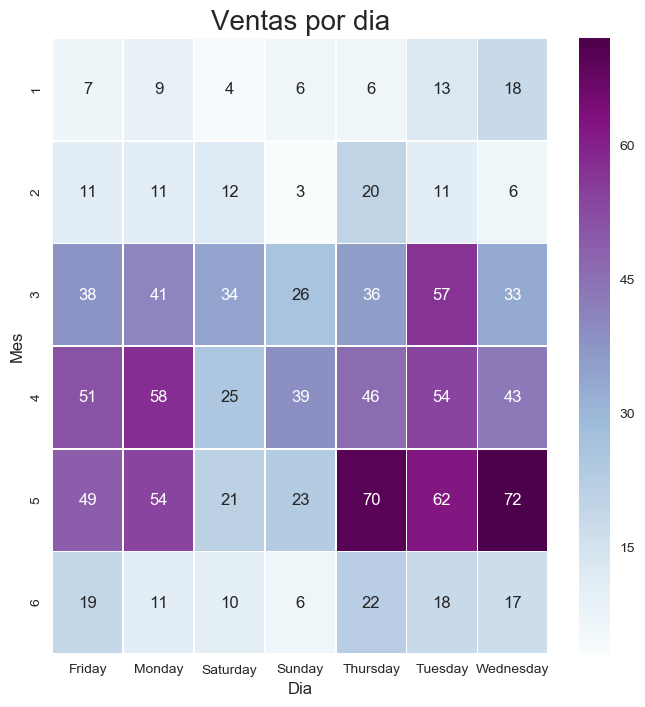

In [35]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("Ventas por dia",fontsize=20)
grafico_dia_mes.set_xlabel("Dia",fontsize=12)
grafico_dia_mes.set_ylabel("Mes",fontsize=12)

En el gráfico se puede ver algo que llamaría la atención, y es que los dias Sabados y Domingos no tienen tantas ventas como el resto de los dias de la semana. Por ejemplo, en el mes 5 los dias Sabado se vendieron 21 productos, y los Miercoles, en cambio, se vendieron 72 productos.

Ahora, analizaremos en que condiciones se compran los 10 productos mas vendidos a nivel global.

In [42]:
df_conversions['counter'] = 1
used_articles = df_conversions.groupby('model')
used_articles = used_articles['counter'].sum()
used_articles = used_articles.sort_values(ascending = False)
used_articles = used_articles.head(20)
articles_conditions = df_conversions.loc[df_conversions['condition'].isin(['Bom', 'Excelente', 'Muito Bom', 'Novo']), : ]
crosstab_aux = articles_conditions.loc[df_conversions['model'].isin(used_articles.index), :]

In [43]:
model_condition = pd.crosstab(crosstab_aux.condition, crosstab_aux.model)
model_condition.head()

model,Motorola Moto G2 3G Dual,Motorola Moto G3 4G,Motorola Moto G4 Plus,Samsung Galaxy A5,Samsung Galaxy Gran Prime 3G Duos,Samsung Galaxy Gran Prime Duos TV,Samsung Galaxy J5,Samsung Galaxy J7,Samsung Galaxy J7 Prime,Samsung Galaxy Note 4,Samsung Galaxy S3 Mini,Samsung Galaxy S5,Samsung Galaxy S6 Flat,Samsung Galaxy S7,Samsung Galaxy S7 Edge,iPhone 5c,iPhone 5s,iPhone 6,iPhone 6S,iPhone SE
condition,,,,,,,,,,,,,,,,,,,,
Bom,3,24,11,13,11,17,55,9,3,9,13,5,29,9,0,28,34,26,12,4
Excelente,9,2,7,1,2,7,7,6,11,0,0,5,4,4,10,2,12,12,12,5
Muito Bom,5,4,12,13,5,0,26,13,6,10,4,8,6,5,7,3,29,23,12,6


Text(72.7222,0.5,'Condición')

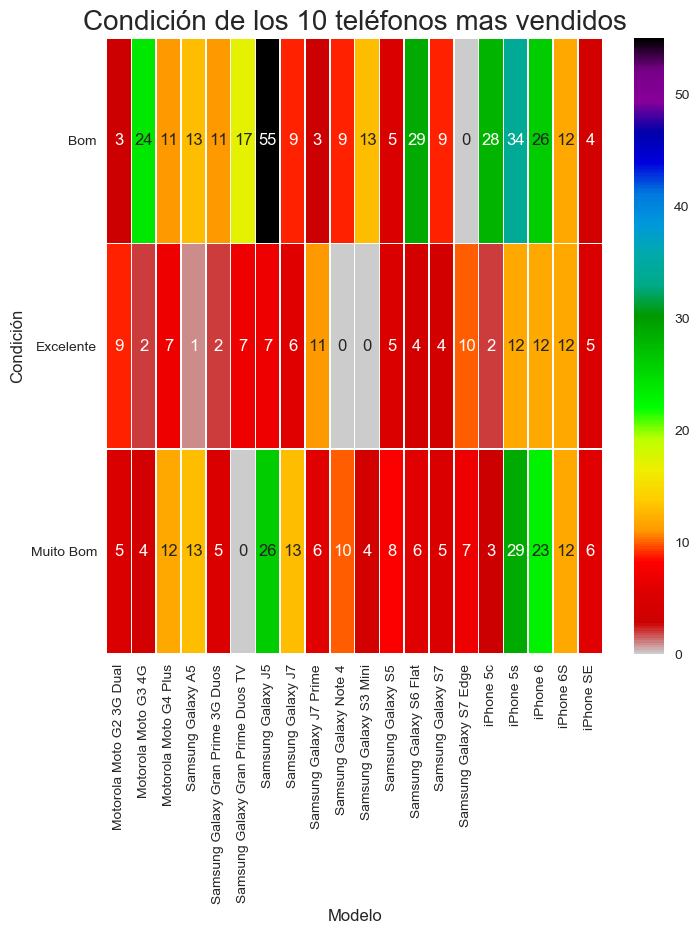

In [44]:
plt.subplots(figsize=(8,8))
grafico_modelo_condicion=sns.heatmap(model_condition,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
grafico_modelo_condicion.set_title("Condición de los 10 teléfonos mas vendidos",fontsize=20)
grafico_modelo_condicion.set_xlabel("Modelo",fontsize=12)
grafico_modelo_condicion.set_ylabel("Condición",fontsize=12)

Se puede ver que la gente prefiere comprar teléfonos que estan en buen estado, pero no en su mejor estado.